In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='fraud', ylabel='count'>

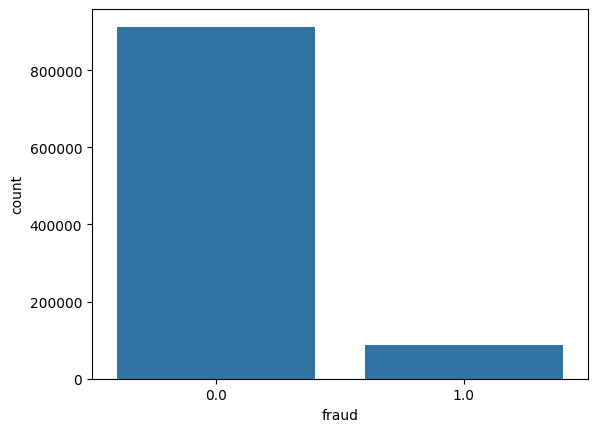

In [5]:
sns.countplot(x='fraud', data=df)

<Axes: xlabel='fraud', ylabel='count'>

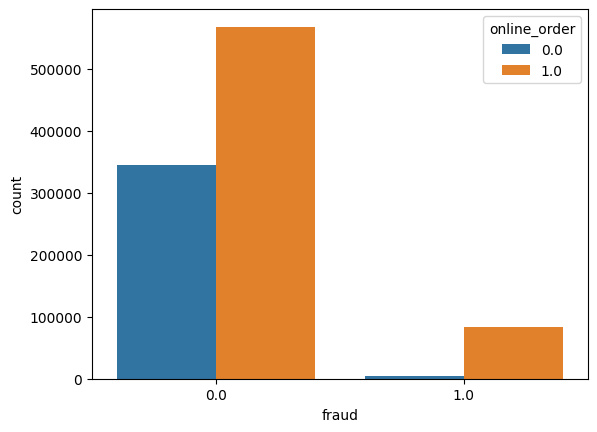

In [6]:
sns.countplot(x='fraud', data=df, hue='online_order')

<Axes: xlabel='fraud', ylabel='count'>

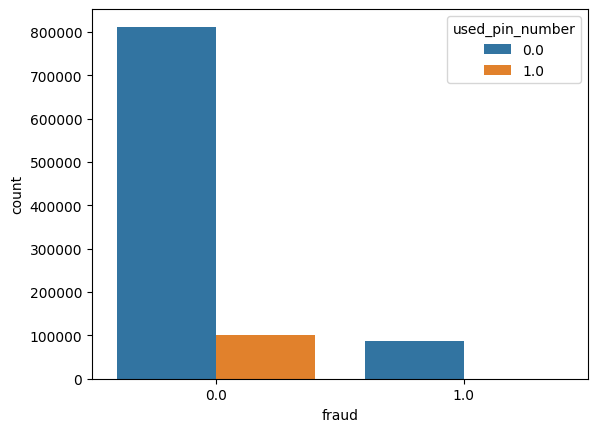

In [7]:
sns.countplot(x='fraud', data=df, hue='used_pin_number')

<Axes: xlabel='fraud', ylabel='count'>

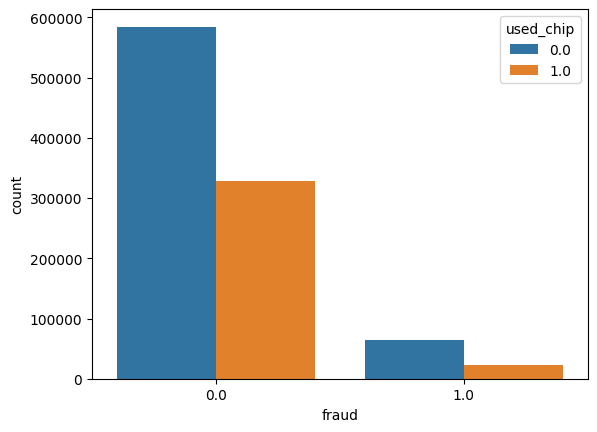

In [8]:
sns.countplot(x='fraud', data=df, hue='used_chip')

<Axes: xlabel='fraud', ylabel='count'>

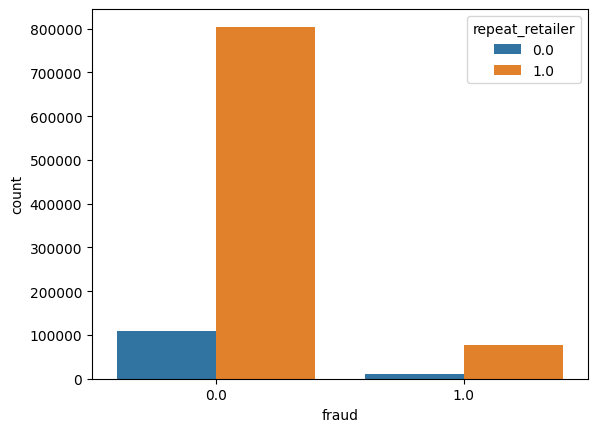

In [10]:
sns.countplot(x='fraud', data=df, hue='repeat_retailer')

<Axes: xlabel='fraud', ylabel='distance_from_last_transaction'>

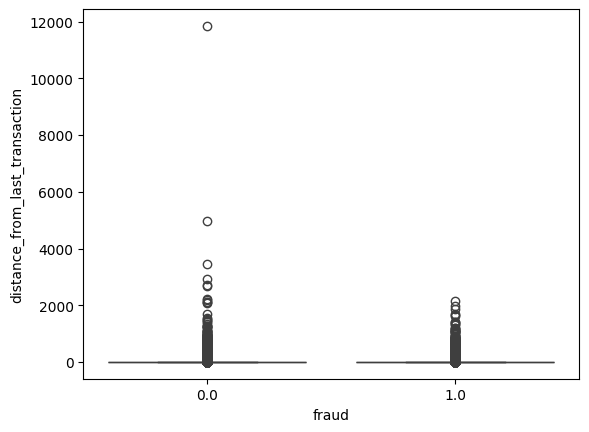

In [11]:
sns.boxplot(x='fraud', y='distance_from_last_transaction', data=df)

<Axes: xlabel='fraud', ylabel='ratio_to_median_purchase_price'>

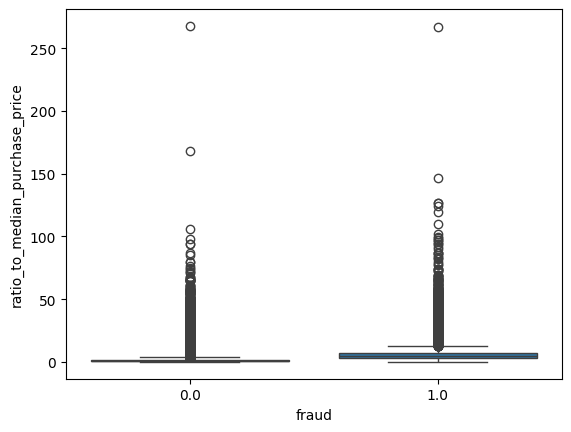

In [12]:
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=df)

<Axes: xlabel='fraud', ylabel='distance_from_home'>

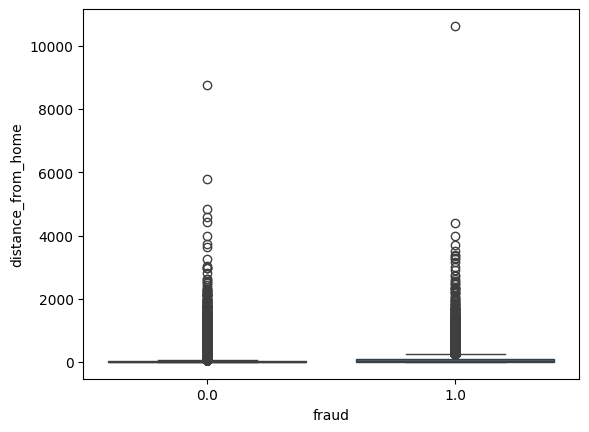

In [13]:
sns.boxplot(x='fraud', y='distance_from_home', data=df)

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC

In [15]:
X = df.drop('fraud',axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800000, 7) (800000,)
(200000, 7) (200000,)


In [17]:
clf1 = GaussianNB()
clf1.fit(X_train, y_train)

GaussianNB()

In [18]:
clf2 = KNN(n_neighbors=7)
clf2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
clf3 = DTC(criterion='gini')
clf3.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
clf4 = DTC(criterion='entropy')
clf4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
clf5 = RFC(n_estimators=10, criterion='gini')
clf5.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [41]:
clfs = [clf1, clf2, clf3, clf4, clf5]
algorithm = ["GaussianNB","KNN","DecisionTreeClassifier","DecisionTreeClassifier(criterion='entropy')","RandomForestClassifier"]

In [24]:
# accuracy

for clf in clfs:
    print(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.95072
0.982645
0.999985
0.999985
0.99996


In [25]:
# precision

for clf in clfs:
    print(precision_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.790295804406882
0.8872751279088958
0.9998860463791237
0.9998860463791237
1.0


In [26]:
# recall

for clf in clfs:
    print(recall_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.5967521367521368
0.918974358974359
0.9999430199430199
0.9999430199430199
0.9995441595441595


In [27]:
# f1

for clf in clfs:
    print(f1_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.6800207778715668
0.902846586615165
0.9999145323495057
0.9999145323495057
0.9997720278126069


## KFOLD:

In [28]:
from sklearn.model_selection import KFold

In [29]:
kf = KFold(n_splits=5)

In [30]:
acc_list = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, y_train = np.asarray(X)[train_index], np.asarray(y)[train_index]
    X_test, y_test = np.asarray(X)[test_index], np.asarray(y)[test_index]
    clf1.fit(X_train, y_train)
    acc_list.append(accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))
    
print(np.mean(acc_list), np.std(acc_list))

0.950479 0.001297460596704207


In [31]:
acc_list = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, y_train = np.asarray(X)[train_index], np.asarray(y)[train_index]
    X_test, y_test = np.asarray(X)[test_index], np.asarray(y)[test_index]
    clf3.fit(X_train, y_train)
    acc_list.append(accuracy_score(y_true=y_test, y_pred=clf3.predict(X_test)))
    
print(np.mean(acc_list), np.std(acc_list))

0.9999839999999999 9.695359714813726e-06


In [32]:
f1_list = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, y_train = np.asarray(X)[train_index], np.asarray(y)[train_index]
    X_test, y_test = np.asarray(X)[test_index], np.asarray(y)[test_index]
    clf3.fit(X_train, y_train)
    acc_list.append(f1_score(y_true=y_test, y_pred=clf3.predict(X_test)))
    
print(np.mean(acc_list), np.std(acc_list))

0.9999519235818012 5.125315013837551e-05


In [33]:
acc_list = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, y_train = np.asarray(X)[train_index], np.asarray(y)[train_index]
    X_test, y_test = np.asarray(X)[test_index], np.asarray(y)[test_index]
    clf5.fit(X_train, y_train)
    acc_list.append(accuracy_score(y_true=y_test, y_pred=clf5.predict(X_test)))
    
print(np.mean(acc_list), np.std(acc_list))

0.9999819999999999 1.4352700094408528e-05


In [34]:
f1_list = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, y_train = np.asarray(X)[train_index], np.asarray(y)[train_index]
    X_test, y_test = np.asarray(X)[test_index], np.asarray(y)[test_index]
    clf5.fit(X_train, y_train)
    acc_list.append(f1_score(y_true=y_test, y_pred=clf5.predict(X_test)))
    
print(np.mean(acc_list), np.std(acc_list))

0.9999537920866606 3.645537312118394e-05


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

cnf = confusion_matrix(y_test,clf1.predict(X_test))
cnf

array([[179691,   2808],
       [  7134,  10367]], dtype=int64)

## we can use this code insted of accuracy_score, f1_score, precision_score and recall_score

In [42]:
i = 0
for clf in clfs:
    print(algorithm[i])
    print(classification_report(y_true=y_test, y_pred=clf.predict(X_test)))
    print("**"*30)
    i += 1

GaussianNB
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    182499
         1.0       0.79      0.59      0.68     17501

    accuracy                           0.95    200000
   macro avg       0.87      0.79      0.82    200000
weighted avg       0.95      0.95      0.95    200000

************************************************************
KNN


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182499
         1.0       0.92      0.95      0.93     17501

    accuracy                           0.99    200000
   macro avg       0.96      0.97      0.96    200000
weighted avg       0.99      0.99      0.99    200000

************************************************************
DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182499
         1.0       1.00      1.00      1.00     17501

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

************************************************************
DecisionTreeClassifier(criterion='entropy')


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182499
         1.0       1.00      1.00      1.00     17501

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

************************************************************
RandomForestClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182499
         1.0       1.00      1.00      1.00     17501

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

************************************************************
